# Цель работы
Освоить методы решения задач линейного программирования с использованием различных библиотек Python и графического метода.

# Задачи:
1. Решить ЗЛП на минимум и максимум методами:

Библиотека pulp

Библиотека scipy.optimize

Библиотека cvxopt

2. Построить графическое решение с областью допустимых значений и оптимальными точками.

3. Сравнить результаты, время работы и точность разных методов.

# Импортируем необходимые библиотеки.

$$Z (X) = x₁ + x₂ + 3x₃ + 4x₄ → min,max$$


$$5 x ₁−6 x ₂+x ₃−2 x ₄=2$$
$$11x ₁−14 x ₂+2 x ₃−5 x ₄=2$$
$$x ≥ 0$$
n = 1,2,3,4.
Ответ: Z min = 7


Нахождение максимума целевой функции с использованием библиотеки pulp

In [63]:
from pulp import *
import time

start = time.time()
x1 = pulp.LpVariable("x1", lowBound=0)
x2 = pulp.LpVariable("x2", lowBound=0)
x3 = pulp.LpVariable("x3", lowBound=0)
x4 = pulp.LpVariable("x4", lowBound=0)

problem = pulp.LpProblem('0',LpMaximize)

#Функция цели
problem += x1 + x2 + 3*x3 + 4*x4, 'Функция цели'
problem += 11*x1 - 14*x2 + 2*x3 - 5*x4 == 2, "1"
problem += 5*x1 - 6*x2 + x3 - 2*x4 == 2, "2"
problem += x1 >= 0
problem += x2 >= 0
problem += x3 >= 0
problem += x4 >= 0

problem.solve()
print ("Результат:")
for variable in problem.variables():
 print (variable.name, "=", variable.varValue)
print ("(максимум):")
print (value(problem.objective))
stop = time.time()
print ("Время :")
print(stop- start)



Результат:
x1 = 0.0
x2 = 0.0
x3 = 6.0
x4 = 2.0
(максимум):
26.0
Время :
0.010756254196166992


Нахождение минимума целевой функции с использованием библиотеки pulp

In [62]:
from pulp import *
import time

start = time.time()

# Создаем переменные
x1 = LpVariable("x1", lowBound=0)
x2 = LpVariable("x2", lowBound=0)
x3 = LpVariable("x3", lowBound=0)
x4 = LpVariable("x4", lowBound=0)

# Создаем задачу на МИНИМИЗАЦИЮ
problem = LpProblem('Zadacha2', LpMinimize)

# Целевая функция (минимизировать)
problem += x1 + x2 + 3*x3 + 4*x4, 'Функция цели'

# Ограничения
problem += 11*x1 - 14*x2 + 2*x3 - 5*x4 == 2, "1"
problem += 5*x1 - 6*x2 + x3 - 2*x4 == 2, "2"

# Ограничения неотрицательности уже заданы в LpVariable(lowBound=0)

problem.solve()

print("Результат:")
for variable in problem.variables():
    print(variable.name, "=", variable.varValue)

print("(минимум):")
print(value(problem.objective))

stop = time.time()
print("Время:")
print(stop - start)

Результат:
x1 = 4.0
x2 = 3.0
x3 = 0.0
x4 = 0.0
(минимум):
7.0
Время:
0.01093745231628418


Нахождение максимума целевой функции с использованием библиотеки cvxopt

In [65]:
from cvxopt.modeling import variable, op
import time

start = time.time()

# Создаем переменные (4 переменные для x1, x2, x3, x4)
x = variable(4, 'x')

# Целевая функция: максимизируем Z = x1 + x2 + 3*x3 + 4*x4
# Для минимизации используем отрицание (так как cvxopt ищет максимум)
z = -(x[0] + x[1] + 3*x[2] + 4*x[3])

# Ограничения
mass1 = (11*x[0] - 14*x[1] + 2*x[2] - 5*x[3] == 2)  # "1"
mass2 = (5*x[0] - 6*x[1] + x[2] - 2*x[3] == 2)      # "2"

# Ограничения неотрицательности
x_non_negative = (x >= 0)  # "3"

# Создаем задачу оптимизации
problem = op(z, [mass1, mass2, x_non_negative])
problem.solve(solver='glpk')

print("(максимум):")
print(abs(problem.objective.value()[0]))  # Берем модуль, так как использовали отрицание

print("Результат:")
print("x1 =", x.value[0])
print("x2 =", x.value[1])
print("x3 =", x.value[2])
print("x4 =", x.value[3])

stop = time.time()
print("Время:")
print(stop - start)

print("Статус:", problem.status)

(максимум):
26.000000000000007
Результат:
x1 = 0.0
x2 = 0.0
x3 = 6.000000000000001
x4 = 2.0000000000000004
Время:
0.006028652191162109
Статус: optimal


Нахождение минимума целевой функции с использованием библиотеки cvxopt

In [66]:
from cvxopt.modeling import variable, op
import time

start = time.time()

# Создаем переменные (4 переменные для x1, x2, x3, x4)
x = variable(4, 'x')

# Целевая функция: минимизируем Z = x1 + x2 + 3*x3 + 4*x4
z = x[0] + x[1] + 3*x[2] + 4*x[3]

# Ограничения
mass1 = (11*x[0] - 14*x[1] + 2*x[2] - 5*x[3] == 2)  # "1"
mass2 = (5*x[0] - 6*x[1] + x[2] - 2*x[3] == 2)      # "2"

# Ограничения неотрицательности
x_non_negative = (x >= 0)  # "3"

# Создаем задачу оптимизации на максимум
problem = op(z, [mass1, mass2, x_non_negative])
problem.solve(solver='glpk')

print("(минимум):")
print(problem.objective.value()[0])

print("Результат:")
print("x1 =", x.value[0])
print("x2 =", x.value[1])
print("x3 =", x.value[2])
print("x4 =", x.value[3])

stop = time.time()
print("Время:")
print(stop - start)

# Статус решения
print("Статус:", problem.status)

(минимум):
7.000000000000005
Результат:
x1 = 4.000000000000003
x2 = 3.000000000000002
x3 = 0.0
x4 = 0.0
Время:
0.003927469253540039
Статус: optimal


Нахождение максимума целевой функции с использованием библиотеки scipy.optimize

In [54]:
from scipy.optimize import linprog
import time
import numpy as np

start = time.time()

# Для максимума используем отрицательные коэффициенты (linprog ищет минимум)
# Целевая функция: максимизировать Z = x1 + x2 + 3*x3 + 4*x4
c = [-1, -1, -3, -4]  # Отрицательные коэффициенты для максимизации

# Ограничения-равенства
A_eq = [
    [11, -14, 2, -5],  # 11x1 - 14x2 + 2x3 - 5x4 = 2
    [5, -6, 1, -2]     # 5x1 - 6x2 + x3 - 2x4 = 2
]
b_eq = [2, 2]

# Границы переменных (неотрицательность)
bounds = [(0, None), (0, None), (0, None), (0, None)]

result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

stop = time.time()

print("Результат:")
print(f"x1 = {result.x[0]:.6f}")
print(f"x2 = {result.x[1]:.6f}")
print(f"x3 = {result.x[2]:.6f}")
print(f"x4 = {result.x[3]:.6f}")
print(f"Z_max = {-result.fun:.6f}")  # Берем с обратным знаком
print(f"Статус: {result.message}")

print("Время:")
print(stop - start)

Результат:
x1 = 0.000000
x2 = 0.000000
x3 = 6.000000
x4 = 2.000000
Z_max = 26.000000
Статус: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Время:
0.003438234329223633


Нахождение минимума целевой функции с использованием библиотеки scipy.optimize

In [55]:
from scipy.optimize import linprog
import time
import numpy as np

start = time.time()

# Для минимума используем прямые коэффициенты (linprog ищет минимум)
# Целевая функция: минимизировать Z = x1 + x2 + 3*x3 + 4*x4
c = [1, 1, 3, 4]  # Прямые коэффициенты для минимизации

# Ограничения-равенства
A_eq = [
    [11, -14, 2, -5],  # 11x1 - 14x2 + 2x3 - 5x4 = 2
    [5, -6, 1, -2]     # 5x1 - 6x2 + x3 - 2x4 = 2
]
b_eq = [2, 2]

# Границы переменных (неотрицательность)
bounds = [(0, None), (0, None), (0, None), (0, None)]

result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

stop = time.time()

print("Результат:")
print(f"x1 = {result.x[0]:.6f}")
print(f"x2 = {result.x[1]:.6f}")
print(f"x3 = {result.x[2]:.6f}")
print(f"x4 = {result.x[3]:.6f}")
print(f"Z_min = {result.fun:.6f}")
print(f"Статус: {result.message}")

print("Время:")
print(stop - start)

Результат:
x1 = 4.000000
x2 = 3.000000
x3 = 0.000000
x4 = 0.000000
Z_min = 7.000000
Статус: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Время:
0.008471488952636719


# Графики

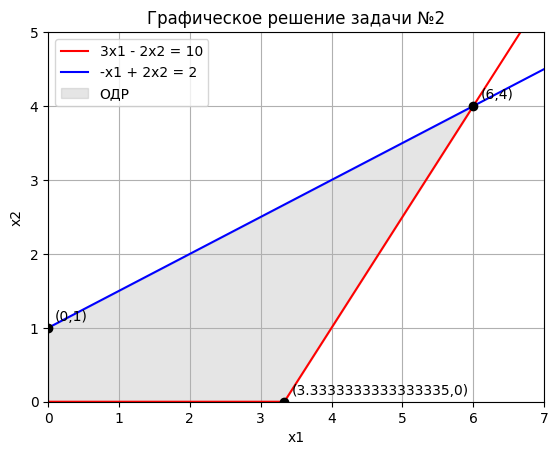

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Ограничения:
# 3x1 - 2x2 <= 10  -> x2 >= (3x1 - 10)/2
# -x1 + 2x2 <= 2   -> x2 <= (x1 + 2)/2
# x1 >= 0, x2 >= 0

x1 = np.linspace(0, 7, 400)
# Условие 1: 3x1 - 2x2 <= 10  -> x2 >= (3x1 - 10)/2
line1 = (3*x1 - 10) / 2
# Условие 2: -x1 + 2x2 <= 2  -> x2 <= (x1 + 2)/2
line2 = (x1 + 2) / 2

# ОДР: x2 >= line1, x2 <= line2, x2 >= 0
# Но line1 при x1<10/3 отрицательна, значит, нижняя граница x2=0.

# Верхняя граница ОДР: min(line2, ...) и учтем, что x2>=0
# Также x3>=0: x2 >= (3x1 - 10)/2
# x4>=0: x2 <= (x1 + 2)/2

# Построим линии
plt.plot(x1, np.maximum(0, line1), 'r-', label='3x1 - 2x2 = 10')
plt.plot(x1, line2, 'b-', label='-x1 + 2x2 = 2')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Заполним ОДР
# ОДР: между line1 и line2, но line1 может быть <0, тогда нижняя граница 0.
x2_lower = np.maximum(0, line1)
x2_upper = line2

# Там, где x2_upper >= x2_lower
valid = x2_upper >= x2_lower
plt.fill_between(x1[valid], x2_lower[valid], x2_upper[valid], alpha=0.2, color='gray', label='ОДР')

# Угловые точки
A = (6, 4)
B = (10/3, 0)
C = (0, 1)
points = [A, B, C]
for (px, py) in points:
    plt.plot(px, py, 'ko')
    plt.text(px + 0.1, py + 0.1, f'({px},{py})')

plt.xlim(0, 7)
plt.ylim(0, 5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.title('Графическое решение задачи №2')
plt.show()

# Вывод
Была решена задача нахождения минимума и максимума при помощи библиотек pulp, scipy.Optimize, cvxopt. Наиболее быстро работало решение с использованием библиотеки pulp.